In [178]:
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit, NegativeBinomial
from statsmodels.formula.api import glm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

scaler = StandardScaler()


In [179]:
X_count= pd.read_csv('big_X.csv')
Y_count=pd.read_csv('big_y.csv')
X_count.drop(columns=['Unnamed: 0','gname_Sinai Province of the Islamic State','targ_Journalists & Media'],inplace=True,axis=1)
Y_count.drop(columns='Unnamed: 0',inplace=True,axis=1)

In [180]:
X_dat_logit = pd.read_csv('logi_dat.csv')
Y_dat_logit = pd.read_csv('logi_Y.csv')
X_dat_logit.drop(columns='Unnamed: 0',inplace=True,axis=1)
Y_dat_logit.drop(columns='Unnamed: 0',inplace=True,axis=1)
X_dat_logit = sm.add_constant(X_dat_logit)

In [181]:
len(X_dat_logit)

139766

In [182]:
len(X_count)

133377

In [183]:
test_size = 0.3
random_state = 42


In [184]:

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_count, Y_count, test_size=test_size, random_state=random_state)
print(f"X_train shape: {X_train_nb.shape}, y_train shape: {y_train_nb.shape}")
print(f"X_test shape: {X_test_nb.shape}, y_test shape: {y_test_nb.shape}")

#X_with_intercept = sm.add_constant(X_train)
#X_test_const = sm.add_constant(X_test)

X_train shape: (93363, 66), y_train shape: (93363, 1)
X_test shape: (40014, 66), y_test shape: (40014, 1)


In [185]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_dat_logit, Y_dat_logit, test_size=test_size, random_state=random_state)
print(f"X_train shape: {X_train_log.shape}, y_train shape: {y_train_log.shape}")
print(f"X_test shape: {X_test_log.shape}, y_test shape: {y_test_log.shape}")

X_train shape: (97836, 44), y_train shape: (97836, 1)
X_test shape: (41930, 44), y_test shape: (41930, 1)


In [186]:
positive_counts = Y_count[Y_count['nkill']>0]

In [187]:
positive_counts = positive_counts['nkill']

In [188]:

# Calculate mean and variance
mean_count = np.mean(positive_counts)
variance_count = np.var(positive_counts, ddof=1)  # ddof=1 for sample variance

print(f"Mean of positive counts: {mean_count}")
print(f"Variance of positive counts: {variance_count}")
# Print comparison
print("Comparison of mean and variance:")
print("Are the mean and variance approximately equal?", np.isclose(mean_count, variance_count, atol=10))


Mean of positive counts: 4.649120092281289
Variance of positive counts: 122.12904091469164
Comparison of mean and variance:
Are the mean and variance approximately equal? False


In [189]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt


In [190]:
# Prepare data for logistic regression (predicting the occurrence of an event)
X_logit = X_train_log
y_logit = y_train_log



# Fit model
logit_model = sm.Logit(y_logit, X_logit)
logit_results = logit_model.fit(disp=0,maxiter=1000)
print(logit_results.summary())


                           Logit Regression Results                           
Dep. Variable:                  letal   No. Observations:                97836
Model:                          Logit   Df Residuals:                    97792
Method:                           MLE   Df Model:                           43
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.3251
Time:                        13:06:01   Log-Likelihood:                -45352.
converged:                       True   LL-Null:                       -67204.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                 

In [191]:

# Prepare data for NB model (only for observations where event occurs)
X_nb = X_train_nb
y_nb = y_train_nb


# Fit model
nb_model = sm.NegativeBinomial(y_nb, X_nb)
nb_results = nb_model.fit(disp=0,maxiter=100)
print(nb_results.summary())


                     NegativeBinomial Regression Results                      
Dep. Variable:                  nkill   No. Observations:                93363
Model:               NegativeBinomial   Df Residuals:                    93297
Method:                           MLE   Df Model:                           65
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.1047
Time:                        13:06:06   Log-Likelihood:            -1.5805e+05
converged:                       True   LL-Null:                   -1.7653e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                 

In [192]:
results = logit_results.predict(X_test_log)
#predicted_counts = nb_results.predict(X_nb[logit_results.predict(X_nb) > 0.5])
results

136426    0.879125
55154     0.647026
91488     0.881702
41557     0.204926
28414     0.775990
            ...   
21369     0.581231
73007     0.343997
94214     0.564114
81877     0.680303
124180    0.939882
Length: 41930, dtype: float64

In [193]:
binary_predictions = np.where(results > 0.5, 1, 0)

Accuracy: 0.7745


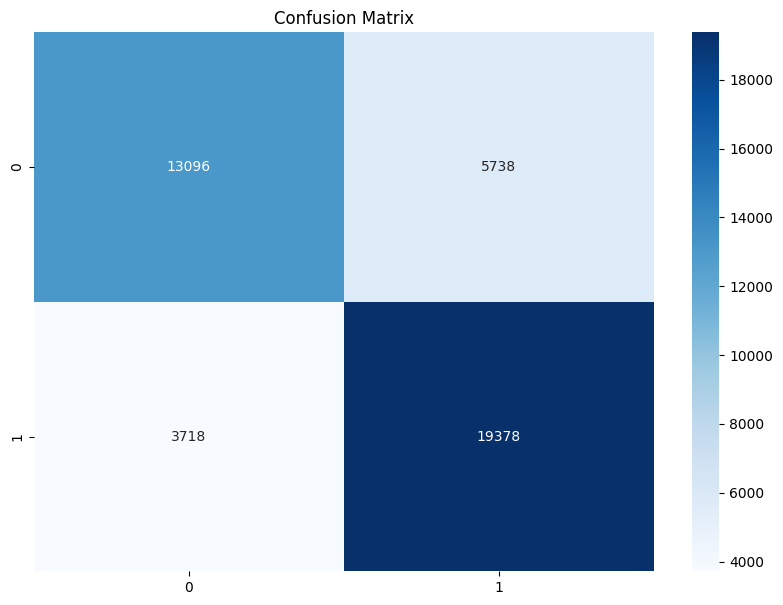

In [194]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test_log, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test_log, binary_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [195]:
score = brier_score_loss(y_test_log,binary_predictions)
print("Brier score:", score)

Brier score: 0.2255187216789888


In [196]:
# Making predictions with the logistic model
prova = logit_results.predict(X_dat_logit)

# Predict counts for those predicted to have the event
#predicted_counts = nb_results.predict(X_nb[logit_results.predict(X_nb) > 0.5])

# Plotting or further analysis
# e.g., comparing predicted counts to actual counts


In [197]:
prova

0         0.649698
1         0.501421
2         0.735429
3         0.258021
4         0.914483
            ...   
139761    0.593686
139762    0.593686
139763    0.010643
139764    0.924643
139765    0.817387
Length: 139766, dtype: float64

In [198]:
predicted_counts

NameError: name 'predicted_counts' is not defined

(array([2.8035e+04, 1.3554e+04, 6.5530e+03, 1.9610e+03, 9.8000e+02,
        4.3200e+02, 3.0700e+02, 5.0200e+02, 7.3000e+01, 1.3300e+02,
        9.1000e+01, 9.4000e+01, 4.7000e+01, 2.0000e+01, 1.9000e+01,
        1.0000e+01, 2.5000e+01, 9.0000e+00, 1.0000e+01, 5.0000e+00,
        6.0000e+00, 1.0000e+01, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.13219799,  2.87583104,  5.61946409,  8.36309714, 11.1067302 ,
        13.85036325, 16.5939963 , 19.33762935, 22.08126241, 24.82489546,
        27.56852851, 30.31216156, 33.05579462, 35.79942767, 38.54306072,
        41.28669377, 44.03032683, 46.77395988, 49.51759293, 52.26122598,
        55.00485904, 57.74849209, 60.49212514, 63.23575819, 65.97939125,
        68.7230243 , 71.46665735, 74.2102904 , 76.95392346, 79.69755651,
        82.44118956]),
 <BarContainer object of 30 artists>)

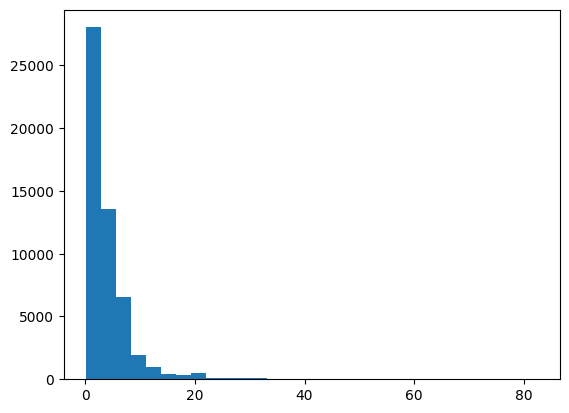

In [ ]:
plt.hist(predicted_counts,bins=30)

In [ ]:
actual_counts = Y.loc[predicted_counts.index, 'nkill']


In [ ]:
mse = mean_squared_error(actual_counts, predicted_counts)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 97.75157460645163
Root Mean Squared Error: 9.88693959759296


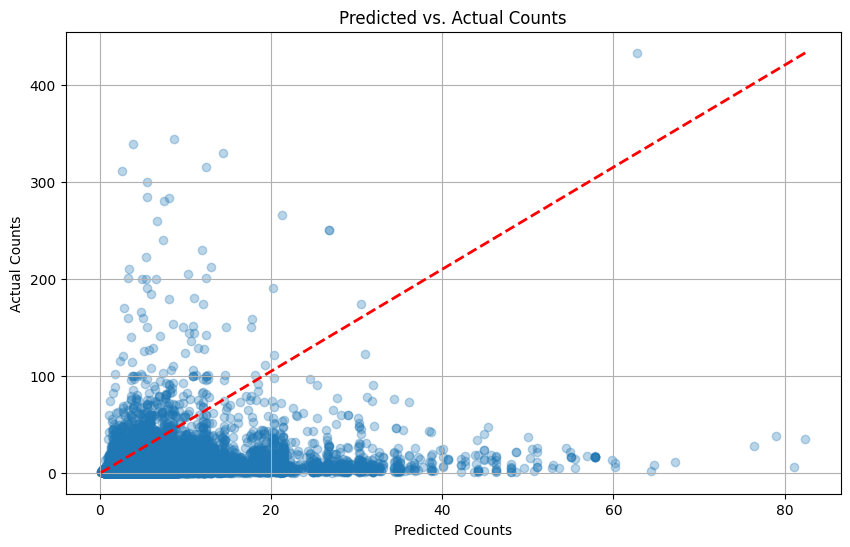

In [ ]:
import matplotlib.pyplot as plt

# Assuming actual_counts and predicted_counts are defined
plt.figure(figsize=(10, 6))
plt.scatter(predicted_counts, actual_counts, alpha=0.3)  # Switch the order here
plt.plot([predicted_counts.min(), predicted_counts.max()], [actual_counts.min(), actual_counts.max()], 'r--', lw=2)
plt.xlabel('Predicted Counts')  # Updated label
plt.ylabel('Actual Counts')    # Updated label
plt.title('Predicted vs. Actual Counts')
plt.grid(True)
plt.show()


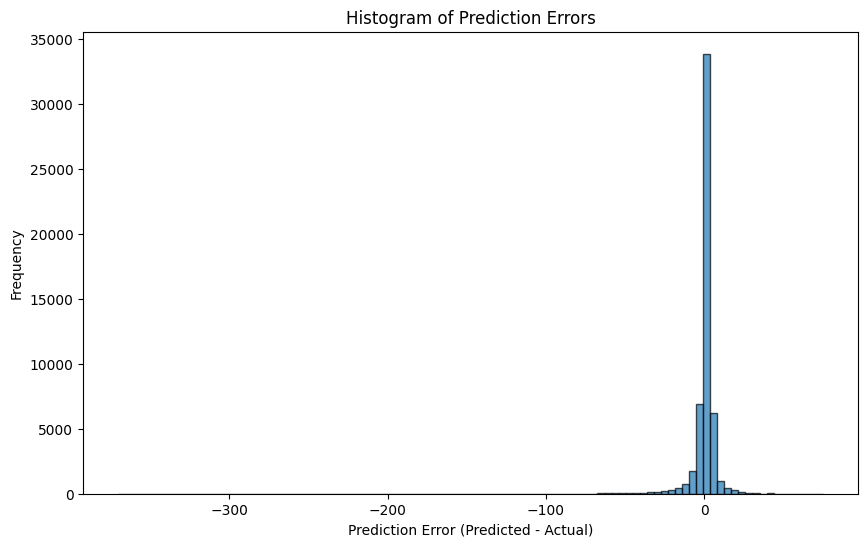

In [ ]:
errors = predicted_counts - actual_counts
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=100, edgecolor='k', alpha=0.7)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
correlation = np.corrcoef(actual_counts, predicted_counts)[0, 1]
print(f"Correlation between actual and predicted counts: {correlation}")


Correlation between actual and predicted counts: 0.26441199338841503


In [ ]:
actual_counts_subset = actual_counts.loc[predicted_counts.index]

In [ ]:
actual_counts

58372     1.0
59809     3.0
105102    0.0
131057    0.0
36387     1.0
         ... 
110268    8.0
119879    0.0
103694    0.0
131932    2.0
121958    1.0
Name: nkill, Length: 52884, dtype: float64

In [ ]:
monte_carlo_medians = np.median(predicted_counts, axis=0)

In [ ]:
predicted_counts

58372     3.857891
59809     3.887336
105102    1.421893
131057    1.747073
36387     3.289942
            ...   
110268    1.559265
119879    1.641010
103694    1.682414
131932    3.694628
121958    1.554307
Length: 52884, dtype: float64

In [ ]:
monte_carlo_medians

2.689433809002786

In [ ]:
predicted_counts = []
for beta_simulation in simulated_betas:
    mean_predicted_rate = np.exp(np.dot(fff, beta_simulation[:-1]))  # log-linear model prediction     must consider without the aplha value
    p = 1 / (1 + mean_predicted_rate * r)  # convert mean rate to probability for NB
    predicted_counts.append(nbinom.rvs(r, p))  # simulate from NB

predicted_counts = np.array(predicted_counts)
monte_carlo_medians = np.median(predicted_counts, axis=0)
prediction_intervals = np.percentile(predicted_counts, [2.5, 97.5], axis=0)

# Calculate metrics
correlation = np.corrcoef(monte_carlo_medians, y_cleaned)[0, 1]
rmse = np.sqrt(mean_squared_error(y_cleaned, monte_carlo_medians))
bias = np.mean(monte_carlo_medians - y_cleaned)  # Mean prediction error
coverage = np.mean((y_cleaned >= prediction_intervals[0,:]) & (y_cleaned <= prediction_intervals[1,:]))

print(f'Correlation: {correlation:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'Bias: {bias:.2f}')
print(f'Coverage: {coverage:.2%}')

NameError: name 'simulated_betas' is not defined

In [ ]:
monte_carlo_medians = np.median(predicted_counts, axis=0)
prediction_intervals = np.percentile(predicted_counts, [2.5, 97.5], axis=0)


# Calculate metrics
correlation = np.corrcoef(monte_carlo_medians, actual_counts_subset)[0, 1]
rmse = np.sqrt(mean_squared_error(actual_counts_subset, monte_carlo_medians))
bias = np.mean(monte_carlo_medians - actual_counts_subset)  # Mean prediction error
coverage = np.mean((actual_counts_subset >= prediction_intervals[0,:]) & (actual_counts_subset <= prediction_intervals[1,:]))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 75728